<a href="https://colab.research.google.com/github/ashleydabb/IS-4487/blob/main/wk13_DABB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487- Week 8 to 13 Assignments

## Objectives

- Week 8 & 9- Data Paration and Exploration
- Week 10 - Modeling with Classification Trees
- Week 11- Modeling with Classification Trees and Pruning
- Week 12- Model Evaluation 
- Week 13- Model Evalution and implementation with a new dataset


##Load Libraries

In this class we will be using 
- Pandas
- Scikitlearn
- Matplotlib


In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics  #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn import tree


## Getting data into Pandas

In this case we will load data from the statsmodels.org library

See the Canvas assignments and lectures for a description of the Megatelco data

**Note:** you will need to enter a code supplied by Google in the next step. 


In [2]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/adviseinvest.csv')


Mounted at /content/gdrive


In [3]:
#look at the top rows
df.head(10) 

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,1,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,0,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
2,1,37570,0,62,2,1,0,0,1.0,3,0,4,0,4
3,0,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
4,0,12400,0,48,1,2,0,0,1.0,2,1,4,0,0
5,1,14030,0,28,2,1,1,0,1.0,0,0,2,0,4
6,1,9320,0,24,2,1,0,1,0.0,3,0,2,0,2
7,1,11750,0,68,0,1,0,0,1.0,1,0,0,0,3
8,1,69670,0,36,3,1,1,0,0.0,1,1,3,0,4
9,1,3380,0,52,2,1,0,1,0.0,0,2,4,0,4


In [4]:
#look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29504 non-null  int64  
 1   income          29504 non-null  int64  
 2   female          29504 non-null  int64  
 3   age             29504 non-null  int64  
 4   job             29504 non-null  int64  
 5   num_dependents  29504 non-null  int64  
 6   rent            29504 non-null  int64  
 7   own_res         29504 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29504 non-null  int64  
 10  sav_acct        29504 non-null  int64  
 11  num_accts       29504 non-null  int64  
 12  mobile          29504 non-null  int64  
 13  product         29504 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 3.2 MB


In [5]:
#describe the data before cleaning it
df.describe()

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29502.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,0.546638,33766.893303,0.054230,34.770065,1.915401,1.140998,0.210412,0.681128,0.240797,1.468547,0.956616,2.458175,0.091106,1.535792
std,0.497829,29379.202710,0.226475,11.355777,0.658183,0.348025,0.407608,0.466047,0.427575,1.234727,1.483946,19.497353,0.287765,1.625916
min,0.000000,-65600.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,0.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,0.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,0.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3345.000000,1.000000,4.000000


## Clean up the data

In [6]:
#Drop rows with N/A values
df_clean = df.dropna(axis = 0, how = 'any')

#Drop rows with negative income 
df_clean.drop(df_clean[df_clean['income'] < 0].index, inplace = True)

#Drop num_accts outlier
df_clean.drop(df_clean[df_clean['num_accts'] > 4].index, inplace = True)

# Remove 'product' variable
df_clean.drop('product', inplace=True, axis=1)

df_clean.describe()

<ipython-input-6-edbb1c308be7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(df_clean[df_clean['income'] < 0].index, inplace = True)
<ipython-input-6-edbb1c308be7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(df_clean[df_clean['num_accts'] > 4].index, inplace = True)
<ipython-input-6-edbb1c308be7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop('product', inplace=True, axis=1)


,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile
count,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000
mean,0.546595,33772.499407,0.054171,34.768840,1.915421,1.141022,0.210448,0.681074,0.240788,1.468355,0.956270,2.344859,0.091088
std,0.497833,29374.485379,0.226359,11.354486,0.658216,0.348050,0.407634,0.466068,0.427569,1.234700,1.483765,1.200390,0.287739
min,0.000000,2760.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,0.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,1.000000,23310.000000,0.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000
75%,1.000000,41690.000000,0.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000
max,1.000000,159450.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,1.000000


In [7]:
#Check that all concerted into factors
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29499 entries, 0 to 29503
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29499 non-null  int64  
 1   income          29499 non-null  int64  
 2   female          29499 non-null  int64  
 3   age             29499 non-null  int64  
 4   job             29499 non-null  int64  
 5   num_dependents  29499 non-null  int64  
 6   rent            29499 non-null  int64  
 7   own_res         29499 non-null  int64  
 8   new_car         29499 non-null  float64
 9   chk_acct        29499 non-null  int64  
 10  sav_acct        29499 non-null  int64  
 11  num_accts       29499 non-null  int64  
 12  mobile          29499 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 3.2 MB


# Convert attributes to factors

- job
-  checking account
- saving account
- product


In [8]:
df_clean['job'] = df['job'].astype('category')
df_clean['chk_acct'] = df['chk_acct'].astype('category')
df_clean['sav_acct'] = df['sav_acct'].astype('category')
df_clean['product'] = df['product'].astype('category')

df_clean.info()

<ipython-input-8-d45163d545d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['job'] = df['job'].astype('category')
<ipython-input-8-d45163d545d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['chk_acct'] = df['chk_acct'].astype('category')
<ipython-input-8-d45163d545d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29499 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   answered        29499 non-null  int64   
 1   income          29499 non-null  int64   
 2   female          29499 non-null  int64   
 3   age             29499 non-null  int64   
 4   job             29499 non-null  category
 5   num_dependents  29499 non-null  int64   
 6   rent            29499 non-null  int64   
 7   own_res         29499 non-null  int64   
 8   new_car         29499 non-null  float64 
 9   chk_acct        29499 non-null  category
 10  sav_acct        29499 non-null  category
 11  num_accts       29499 non-null  int64   
 12  mobile          29499 non-null  int64   
 13  product         29499 non-null  category
dtypes: category(4), float64(1), int64(9)
memory usage: 2.6 MB


In [9]:
print(df['answered'].value_counts()[1])

16128


# Turn answered code 0/1 into yes or no

In [10]:
df_clean['answered'] = df_clean['answered'].astype('category')

<ipython-input-10-fc57245b605c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['answered'] = df_clean['answered'].astype('category')


In [11]:
#df_clean['answered'] = df_clean['answered'].map({1:'yes', 0:'no'})
df_clean.head(10)

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,1,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,0,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
2,1,37570,0,62,2,1,0,0,1.0,3,0,4,0,4
3,0,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
4,0,12400,0,48,1,2,0,0,1.0,2,1,4,0,0
5,1,14030,0,28,2,1,1,0,1.0,0,0,2,0,4
6,1,9320,0,24,2,1,0,1,0.0,3,0,2,0,2
7,1,11750,0,68,0,1,0,0,1.0,1,0,0,0,3
8,1,69670,0,36,3,1,1,0,0.0,1,1,3,0,4
9,1,3380,0,52,2,1,0,1,0.0,0,2,4,0,4


In [12]:
df_clean.head(5)

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,1,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,0,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
2,1,37570,0,62,2,1,0,0,1.0,3,0,4,0,4
3,0,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
4,0,12400,0,48,1,2,0,0,1.0,2,1,4,0,0


In [13]:
#Q 1 week 11
# split the datafram into independent (x) and dependent (predicted) attributes (y)
x = df_clean[['income', 'female', 'age', 'job','num_dependents','rent','own_res','new_car', 'chk_acct', 'sav_acct','num_accts','mobile']]
y = df_clean['answered']

#place 20% of data in a test dataframe
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [14]:
answer_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Create Decision Tree Classifer
answer_tree = answer_tree.fit(x_train,y_train)

# Use the tree to predict "answered"
y_predict = (answer_tree.predict_proba(x)[:,1] >= 0.5)
y_predict

array([ True, False,  True, ...,  True,  True, False])

In [15]:
# create a confusion matrix
answer_tree_matrix = confusion_matrix(y, y_predict)
print(answer_tree_matrix)

[[11583  1792]
 [ 6080 10044]]


Check Accuracy

In [16]:
pred = answer_tree.predict(x)

#print(pred)
print("Accuracy:",metrics.accuracy_score(y, y_predict))

Accuracy: 0.7331434963897081


Week 12 Assignment

In [17]:
# create a confusion matrix
answer_tree_matrix = confusion_matrix(y, y_predict)
print(answer_tree_matrix)

[[11583  1792]
 [ 6080 10044]]


[Text(0, 0.5, 'Unanswered'), Text(0, 1.5, 'Answered')]

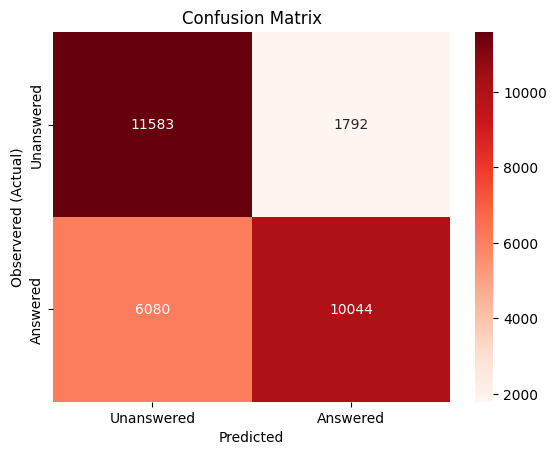

In [18]:
#Create a heatmap from our confusion matrix
cm = sns.heatmap(answer_tree_matrix, annot=True, fmt='d',cmap='Reds')

cm.set_title('Confusion Matrix');
cm.set_xlabel('Predicted')
cm.set_ylabel('Observered (Actual)');

cm.xaxis.set_ticklabels(['Unanswered','Answered'])
cm.yaxis.set_ticklabels(['Unanswered','Answered'])

#Calculate Profit
Using the confusion matrix in the previous question how much profit (revenue - costs) could be expected with these costs-benefits?

 assume benefit (revenue) = 800 and cost = 200. TPs are a benefit, FPs are a cost. Again, we ignore those predicted to stay. (The cost-benefit numbers will be different in the AdviseInvest case! )

In [19]:
# True positive * 75 (revenue 800) -> You rescued these Answered people
# False postive * 25 (cost 200)-> You wasted your money on the Should answered-actually not answered (FP) people since they weren't actually going to leave
10556 * (100-25) - 2112 * 25

738900

# Week 13 Assignment


Question 1: How much profit (revenue - costs) would we expect with the classification tree model from above using a class decision threshold of .3?

In [20]:
full_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Create Decision Tree Classifer
full_tree = full_tree.fit(x_train,y_train)

# Use the tree to predict "answered"
y_predict2 = (full_tree.predict_proba(x)[:,1] >= 0.3)
y_predict2

array([ True, False,  True, ...,  True,  True, False])

In [21]:
# create a confusion matrix
full_tree_matrix = confusion_matrix(y, y_predict2)
print(full_tree_matrix)

[[ 1920 11455]
 [   64 16060]]


In [22]:
# Check accuracy
pred = full_tree.predict(x)

#print(pred)
print("Accuracy:",metrics.accuracy_score(y, y_predict2))

Accuracy: 0.6095121868537916


[Text(0, 0.5, 'Unanswered'), Text(0, 1.5, 'Answered')]

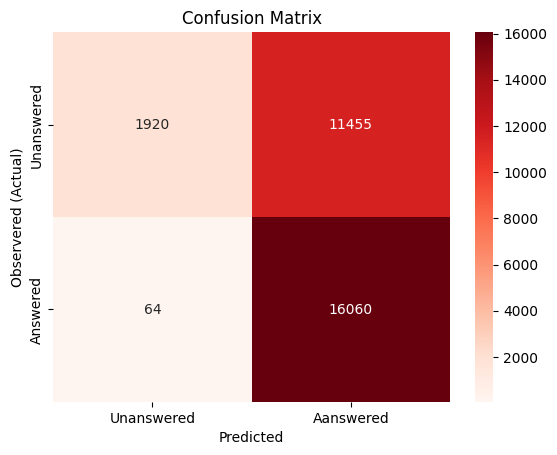

In [23]:
#Create a heatmap from our confusion matrix
cm = sns.heatmap(full_tree_matrix, annot=True, fmt='d',cmap='Reds')

cm.set_title('Confusion Matrix');
cm.set_xlabel('Predicted')
cm.set_ylabel('Observered (Actual)');

cm.xaxis.set_ticklabels(['Unanswered','Aanswered'])
cm.yaxis.set_ticklabels(['Unanswered','Answered'])

In [24]:
#calculate profit for assignment 13 of .3 threshold
# True positive * 75 (revenue 800) -> You rescued these Answered people
# False postive * 25 (cost 200)-> You wasted your money on the Should answered-actually not answered (FP) people since they weren't actually going to leave
16060 * (100-25) - 11455 * 25

918125

Question 2
New customer data set
Steps:
1. Use the supervised model you created for the first question to predict a probability of answering for each prospective customer. 
2. Assign a predicted class label of "yes" to every customer whose model-estimated probability of answering that is .3 or greater.  (This is the optimal class decision threshold.). 
3. Filter the dataset to contain  only prospective customers with a predicted class label of "yes" (those whose predicted probability of answering is greater than .2).  This is your contact list.

How many customers are on the contact list?


In [25]:
#import new dataset customer
df_new = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/customer_data.csv')


In [26]:
#Preview the new data
df_new.describe()

,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,34033.260000,0.050000,35.01400,1.947000,1.13900,0.213000,0.68300,0.227000,1.486000,1.018000,2.406000,0.103000
std,29474.002504,0.218054,11.40473,0.663801,0.34612,0.409633,0.46554,0.419102,1.229356,1.527747,1.188519,0.304111
min,2760.000000,0.000000,19.00000,0.000000,1.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13505.000000,0.000000,26.00000,2.000000,1.00000,0.000000,0.00000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,23660.000000,0.000000,32.00000,2.000000,1.00000,0.000000,1.00000,0.000000,1.000000,0.000000,2.000000,0.000000
75%,42970.000000,0.000000,41.00000,2.000000,1.00000,0.000000,1.00000,0.000000,3.000000,2.000000,4.000000,0.000000
max,159450.000000,1.000000,74.00000,3.000000,2.00000,1.000000,1.00000,1.000000,3.000000,4.000000,4.000000,1.000000


In [27]:
#delete rows with outlier data; put it in a new dataframe
df_clean_new = df_new[(df_new['num_accts'] < 4) & (df_new['income'] > 0) ]

#delete any rows with missing values in the clean dataframe
df_clean_new = df_clean_new.dropna() 

df_clean_new.describe()

,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,32883.530201,0.034899,32.063087,1.877852,1.114094,0.241611,0.702013,0.213423,1.507383,0.907383,1.860403,0.093960
std,27549.285703,0.183648,9.647137,0.661828,0.318139,0.428347,0.457681,0.409999,1.234696,1.452940,0.853111,0.291969
min,2760.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14120.000000,0.000000,25.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,23330.000000,0.000000,30.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000
75%,40570.000000,0.000000,36.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000,2.000000,0.000000
max,159450.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000


In [28]:
df_clean_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   income          745 non-null    int64 
 1   female          745 non-null    int64 
 2   age             745 non-null    int64 
 3   job             745 non-null    int64 
 4   num_dependents  745 non-null    int64 
 5   rent            745 non-null    int64 
 6   own_res         745 non-null    int64 
 7   new_car         745 non-null    int64 
 8   chk_acct        745 non-null    int64 
 9   sav_acct        745 non-null    int64 
 10  num_accts       745 non-null    int64 
 11  mobile          745 non-null    int64 
 12  customer_id     745 non-null    object
dtypes: int64(12), object(1)
memory usage: 81.5+ KB


In [29]:
df_clean_new.head(20)

,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,customer_id
0,30010,0,40,2,1,1,0,0,1,0,3,0,H1597
1,30510,0,54,2,1,0,1,0,0,0,2,0,P1446
3,15530,0,44,2,1,0,1,0,0,0,2,0,W5143
4,46230,0,40,3,1,0,1,0,3,1,2,0,W4927
5,17430,0,34,1,1,0,1,0,3,1,2,0,M6161
7,27820,0,31,3,1,0,1,1,3,2,3,0,H557
8,7070,0,30,2,1,0,1,0,3,0,2,0,B54
9,14120,0,29,3,1,0,1,0,3,0,2,0,L2217
10,4580,0,24,2,1,0,1,0,1,0,2,0,M8502
11,13660,0,22,2,1,1,0,0,0,0,1,0,I2671


In [30]:
# split the datafram into independent (x) and dependent (predicted) attributes (y)
x_new = df_clean_new[['income', 'female', 'age', 'job','num_dependents','rent','own_res','new_car', 'chk_acct', 'sav_acct','num_accts','mobile']]
#no independent

#Now we can predict customers

In [31]:
# Use the tree to predict "answer"("leave") from the full tree
y_new_predict = (full_tree.predict_proba(x_new)[:,1] >= 0.3)

#Convert it to a dataframe
df_new_predict = pd.DataFrame(y_new_predict)

df_new_predict.head()

,0
0,True
1,True
2,True
3,True
4,True


In [32]:
df_new_predict.describe()

,0
count,745
unique,2
top,True
freq,699


In [33]:
df_new_predict.value_counts()

True     699
False     46
dtype: int64